In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def __init__(self, fit_intercept):
        self.fit_intercept = fit_intercept
        self.coeff_ = None
        self.rank_ = None
        self.intercept_ = None
        self.n_features_in_ = 0
        self.singular_ = None
        
    def fit(self, X, y):
        self.n_features_in_ = X.shape[1]
        self.rank_ = np.linalg.matrix_rank(X)
        self.singular_ = np.linalg.svdvals(X)
        
        if self.fit_intercept:
            X_mean = np.mean(X, axis=0)
            y_mean = np.mean(y)
            X_centred = X - X_mean
            y_centred = y - y_mean
            self.coeff_ = np.linalg.pinv(X_centred.T@X_centred)@X_centred.T@y_centred
            self.intercept_ = y_mean - X_mean@self.coeff_
        else:
            self.coeff_ = np.linalg.pinv((X.T)@X)@(X.T)@y
        
    def predict(self, X_test):
        return X_test @ self.coeff_
        
    def score(self, y_pred, y_test):
        mse = np.mean((y_pred - y_test)**2)
        rmse = np.sqrt(mse)
        print("The root mean square error is : ", rmse)
        

In [3]:
X = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])
y = np.array([10,20,30,40,50])

X_test = np.array([[3,4,5], [8,9,10]])
y_test = np.array([15, 35])

linreg = LinearRegression(fit_intercept=True)

linreg.fit(X,y)
y_pred = linreg.predict(X_test)
rmse = linreg.score(y_pred, y_test)

The root mean square error is :  3.726779962499652


In [4]:
linreg.coeff_ , linreg.rank_ , linreg.intercept_ , linreg.n_features_in_ , linreg.singular_

(array([1.11111111, 1.11111111, 1.11111111]),
 np.int64(2),
 np.float64(3.3333333333333357),
 3,
 array([3.51826483e+01, 1.47690770e+00, 3.74442300e-16]))

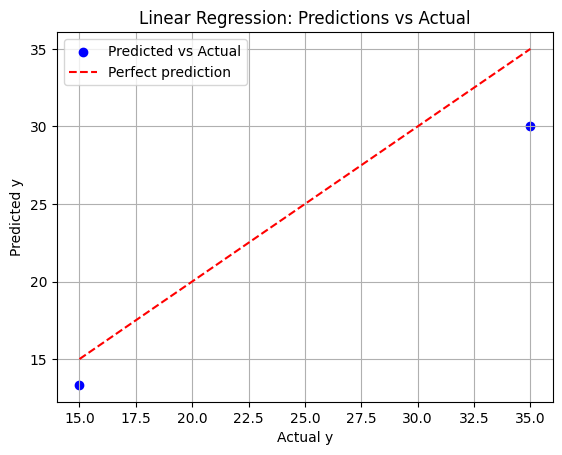

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect prediction')

plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Linear Regression: Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()

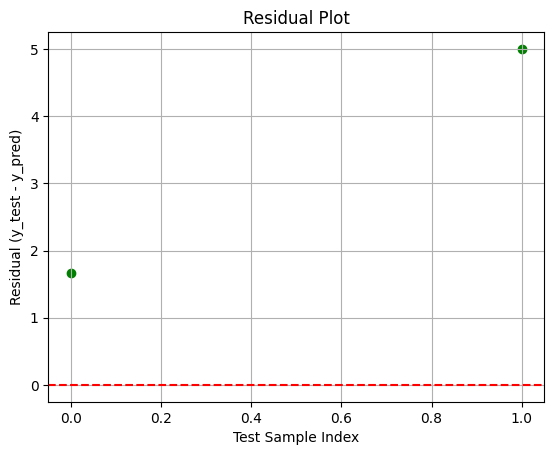

In [6]:
residuals = y_test - y_pred

plt.axhline(0, color='red', linestyle='--')
plt.scatter(range(len(y_test)), residuals, color='green')
plt.xlabel('Test Sample Index')
plt.ylabel('Residual (y_test - y_pred)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()